In [157]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
import re
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [158]:
df = pd.read_csv('heart.csv')

In [159]:
df.columns = ['Age', 'Gender', 'Chest_Pain', 'Resting_Blood_Pressure', 'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG', 'Max_Heart_Rate',
       'Exercise_Indused_Angina', 'Oldpeak', 'Slope', 'Major_Vessels', 'Thalassemia', 'Target']

In [160]:
df.shape

(1025, 14)

In [161]:
df.duplicated().sum()

723

In [162]:
df = df.drop_duplicates()

In [163]:
df.columns

Index(['Age', 'Gender', 'Chest_Pain', 'Resting_Blood_Pressure',
       'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG',
       'Max_Heart_Rate', 'Exercise_Indused_Angina', 'Oldpeak', 'Slope',
       'Major_Vessels', 'Thalassemia', 'Target'],
      dtype='object')

In [164]:
df.isnull().sum()

Age                        0
Gender                     0
Chest_Pain                 0
Resting_Blood_Pressure     0
Serum_Cholesterol          0
Fasting_Blood_Sugar        0
Resting_ECG                0
Max_Heart_Rate             0
Exercise_Indused_Angina    0
Oldpeak                    0
Slope                      0
Major_Vessels              0
Thalassemia                0
Target                     0
dtype: int64

In [165]:
df.dtypes

Age                          int64
Gender                       int64
Chest_Pain                   int64
Resting_Blood_Pressure       int64
Serum_Cholesterol            int64
Fasting_Blood_Sugar          int64
Resting_ECG                  int64
Max_Heart_Rate               int64
Exercise_Indused_Angina      int64
Oldpeak                    float64
Slope                        int64
Major_Vessels                int64
Thalassemia                  int64
Target                       int64
dtype: object

In [166]:
df.nunique()

Age                         41
Gender                       2
Chest_Pain                   4
Resting_Blood_Pressure      49
Serum_Cholesterol          152
Fasting_Blood_Sugar          2
Resting_ECG                  3
Max_Heart_Rate              91
Exercise_Indused_Angina      2
Oldpeak                     40
Slope                        3
Major_Vessels                5
Thalassemia                  4
Target                       2
dtype: int64

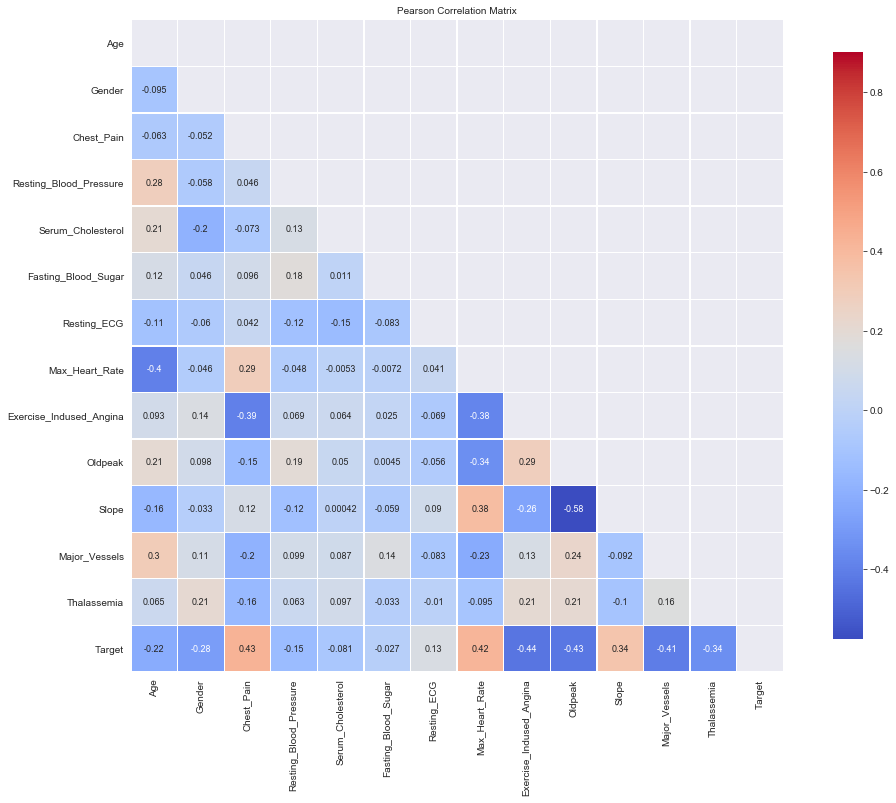

In [167]:
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(18, 12))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.9,square=True,cmap="coolwarm",
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()

## Start with Target Variable - Heart Disease
## 0 = No Disease, 1 = Disease
---angiographic disease status

In [168]:
# For Visualization Purposes
df['Heart_Disease'] = np.where(df['Target'] == 0,'Healthy Heart','Heart Disease')

In [13]:
#Default Count
print('Target Variable')
print(df.groupby(['Heart_Disease']).Heart_Disease.count())

Target Variable
Heart_Disease
Healthy Heart    138
Heart Disease    164
Name: Heart_Disease, dtype: int64


In [14]:
#Percentages 
print("Percent without Disease")
print((df.groupby(['Heart_Disease']).Heart_Disease.count()[0]/df.groupby(['Heart_Disease']).Heart_Disease.count().sum()))
print("Percent with Disease")
print((df.groupby(['Heart_Disease']).Heart_Disease.count()[1]/df.groupby(['Heart_Disease']).Heart_Disease.count().sum()))

# Seems to be somewhat Balanced dataset

Percent without Disease
0.45695364238410596
Percent with Disease
0.543046357615894


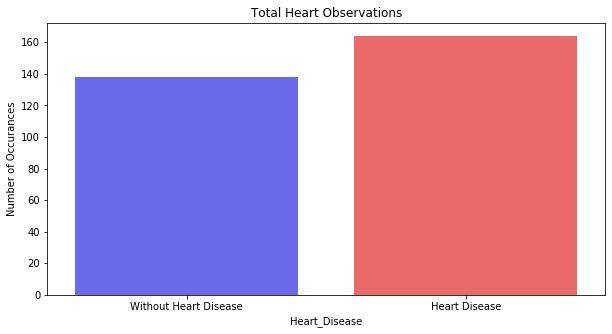

In [15]:
#Target Variable Countplot
plt.figure(figsize = (10,5))
sns.countplot(df['Heart_Disease'], palette="seismic")
plt.title('Total Heart Observations')
plt.ylabel('Number of Occurances')
plt.xticks(np.arange(2), ['Without Heart Disease','Heart Disease'])
plt.show()

## Independant Variable 1 : Age

In [16]:
df.Age.describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: Age, dtype: float64

In [17]:
#for colname in categorical:
#df['Gender'] = df['Gender'].astype(object)

In [18]:
df.Gender.describe()

count    302.000000
mean       0.682119
std        0.466426
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Gender, dtype: float64

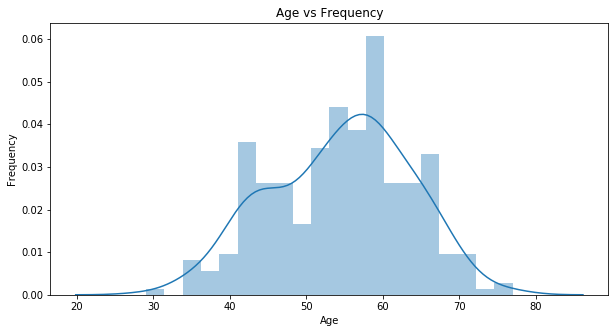

In [19]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df.Age,kde=True, bins=20);
ax.set(xlabel='Age', ylabel='Frequency', title='Age vs Frequency');

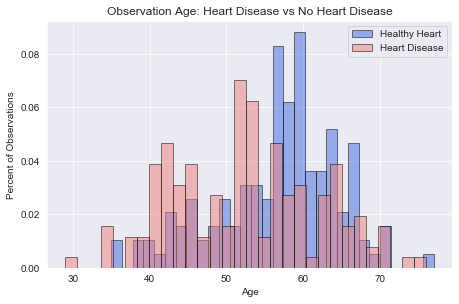

In [20]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))

ax1 = fig.add_subplot(221)
ax1.hist(df[df['Heart_Disease'] == 'Healthy Heart'].Age, label = 'Healthy Heart', 
         density = True, bins = 30, alpha = .50,edgecolor= 'black',color ='royalblue')

ax1.hist(df[df['Heart_Disease'] == 'Heart Disease'].Age, label = 'Heart Disease', 
         density = True, bins = 30, alpha = .50, edgecolor = 'black',color = 'lightcoral')

ax1.set_title('Observation Age: Heart Disease vs No Heart Disease')
ax1.set_xlabel('Age')
ax1.set_ylabel('Percent of Observations')
ax1.legend(loc = 'upper right')


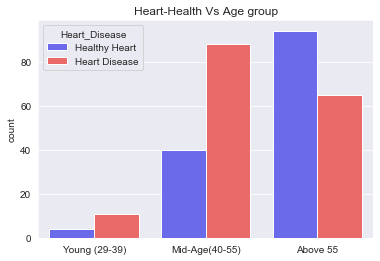

In [243]:
age_groups=[]
for i in df['Age']:
    if (i >= 29) & (i < 40):
        age_groups.append(0)
    elif (i >= 40)&(i < 55):
        age_groups.append(1)
    else:
        age_groups.append(2)
df['Age-Group'] = age_groups

plt.title("Heart-Health Vs Age group")
ax = sns.countplot(x=age_groups,hue='Heart_Disease',data=df.reset_index(),palette="seismic")
ax.set_xticklabels(['Young (29-39)','Mid-Age(40-55)','Above 55']);
plt.savefig('mf3.png')

Age notes:

--Seem to be observing a lot of people in the 50-65 range


--Interesting spike of Heart Disease case with 40-55 year olds

## Independant Variable 2: Gender

0 = Female
1 = Male

In [235]:
df.groupby(['Heart_Disease','Gender']).describe()
# A lot more Males observations
# Observed females have higher chance of Heart Disease

Age                                                  \
                      count       mean        std   min    25%   50%    75%   
Heart_Disease Gender                                                          
Healthy Heart 0        24.0  59.041667   4.964913  43.0  56.75  60.5  62.00   
              1       114.0  56.087719   8.385155  35.0  51.00  57.5  61.00   
Heart Disease 0        72.0  54.555556  10.265337  34.0  46.00  54.0  63.25   
              1        92.0  51.043478   8.623904  29.0  44.00  52.0  57.00   

                           Chest_Pain            ... Oldpeak_Binary       \
                       max      count      mean  ...            75%  max   
Heart_Disease Gender                             ...                       
Healthy Heart 0       66.0       24.0  0.166667  ...            1.0  1.0   
              1       77.0      114.0  0.543860  ...            1.0  1.0   
Heart Disease 0       76.0       72.0  1.333333  ...            1.0  1.0   
              1       70.0       92.0  1.402174  ...            1.0  1.0   

                     Age-Group                                               
                         count      mean       std  min  25%  50%  75%  max  
Heart_Disease Gender                                                         
Healthy Heart 0           24.0  1.916667  0.282330  1.0  2.0  2.0  2.0  2.0  
              1          114.0  1.596491  0.560014  0.0  1.0  2.0  2.0  2.0  
Heart Disease 0           72.0  1.402778  0.620307  0.0  1.0  1.0  2.0  2.0  
              1           92.0  1.271739  0.576142  0.0  1.0  1.0  2.0  2.0  

[4 rows x 120 columns]

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

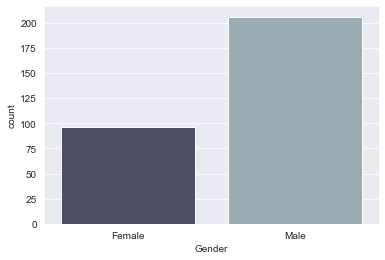

In [23]:
g = sns.countplot(x = 'Gender', data = df, palette = 'bone')
g.set_xticklabels(['Female','Male'])

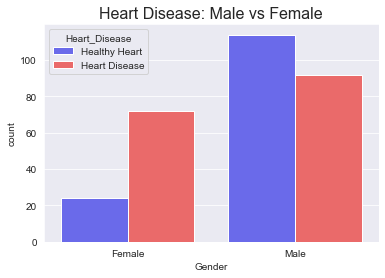

In [240]:
mf = sns.countplot(x='Gender',hue="Heart_Disease",data=df.reset_index(),palette='seismic')
mf.set_xticklabels(['Female','Male'])
mf.set_title('Heart Disease: Male vs Female',fontsize=16 )
plt.savefig('mf.png')

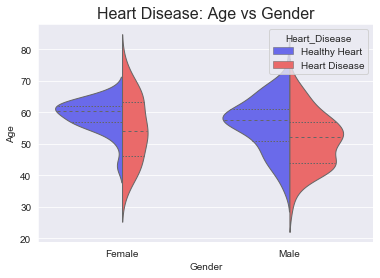

In [242]:
ag = sns.violinplot(data=df, x="Gender", y="Age", hue="Heart_Disease",
               split=True, inner="quart", linewidth=1,palette="seismic")
ag.set_xticklabels(['Female','Male'])
ag.set_title('Heart Disease: Age vs Gender',fontsize=16)
plt.savefig('mf2.png')

# A lot of observations around 60 years old. Makes me think younger people only beign observed when showing symptoms

## Independant Variable 3: Chest Pain

In [181]:
##### Create Chest Pain Bins #####
bins = [-1,0,1,2,3]
labels = ['Typical Angina','Atypical Angina','Non-Anginal','Asymptomatic']
df['Chest_Pain_Type'] = pd.cut(df['Chest_Pain'], bins=bins, labels=labels)

In [183]:
df.groupby['Chest_Pain_Type'].value_counts()

Typical Angina     143
Non-Anginal         86
Atypical Angina     50
Asymptomatic        23
Name: Chest_Pain_Type, dtype: int64

In [187]:
df.groupby(['Heart_Disease','Chest_Pain_Type']).count()

Age  Gender  Chest_Pain  \
Heart_Disease Chest_Pain_Type                            
Healthy Heart Typical Angina   104     104         104   
              Atypical Angina    9       9           9   
              Non-Anginal       18      18          18   
              Asymptomatic       7       7           7   
Heart Disease Typical Angina    39      39          39   
              Atypical Angina   41      41          41   
              Non-Anginal       68      68          68   
              Asymptomatic      16      16          16   

                               Resting_Blood_Pressure  Serum_Cholesterol  \
Heart_Disease Chest_Pain_Type                                              
Healthy Heart Typical Angina                      104                104   
              Atypical Angina                       9                  9   
              Non-Anginal                          18                 18   
              Asymptomatic                          7                  7   
Heart Disease Typical Angina                       39                 39   
              Atypical Angina                      41                 41   
              Non-Anginal                          68                 68   
              Asymptomatic                         16                 16   

                               Fasting_Blood_Sugar  Resting_ECG  \
Heart_Disease Chest_Pain_Type                                     
Healthy Heart Typical Angina                   104          104   
              Atypical Angina                    9            9   
              Non-Anginal                       18           18   
              Asymptomatic                       7            7   
Heart Disease Typical Angina                    39           39   
              Atypical Angina                   41           41   
              Non-Anginal                       68           68   
              Asymptomatic                      16           16   

                               Max_Heart_Rate  Exercise_Indused_Angina  \
Heart_Disease Chest_Pain_Type                                            
Healthy Heart Typical Angina              104                      104   
              Atypical Angina               9                        9   
              Non-Anginal                  18                       18   
              Asymptomatic                  7                        7   
Heart Disease Typical Angina               39                       39   
              Atypical Angina              41                       41   
              Non-Anginal                  68                       68   
              Asymptomatic                 16                       16   

                               Oldpeak  Slope  Major_Vessels  Thalassemia  \
Heart_Disease Chest_Pain_Type                                               
Healthy Heart Typical Angina       104    104            104          104   
              Atypical Angina        9      9              9            9   
              Non-Anginal           18     18             18           18   
              Asymptomatic           7      7              7            7   
Heart Disease Typical Angina        39     39             39           39   
              Atypical Angina       41     41             41           41   
              Non-Anginal           68     68             68           68   
              Asymptomatic          16     16             16           16   

                               Target  
Heart_Disease Chest_Pain_Type          
Healthy Heart Typical Angina      104  
              Atypical Angina       9  
              Non-Anginal          18  
              Asymptomatic          7  
Heart Disease Typical Angina       39  
              Atypical Angina      41  
              Non-Anginal          68  
              Asymptomatic         16

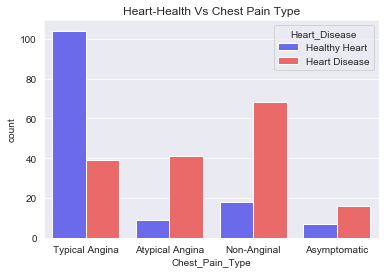

In [247]:
plt.title("Heart-Health Vs Chest Pain Type")
ax = sns.countplot(x='Chest_Pain_Type',hue="Heart_Disease",data=df.reset_index(),palette='seismic')
plt.savefig('cp.png')

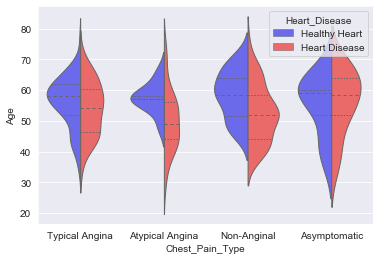

In [28]:
cp = sns.violinplot(data=df, x="Chest_Pain_Type", y="Age", hue="Heart_Disease",
               split=True, inner="quart", linewidth=1,palette="seismic")

In [249]:
df.columns

Index(['Age', 'Gender', 'Chest_Pain', 'Resting_Blood_Pressure',
       'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG',
       'Max_Heart_Rate', 'Exercise_Indused_Angina', 'Oldpeak', 'Slope',
       'Major_Vessels', 'Thalassemia', 'Target', 'Heart_Disease',
       'Chest_Pain_Type', 'Oldpeak_Binary', 'Age-Group'],
      dtype='object')

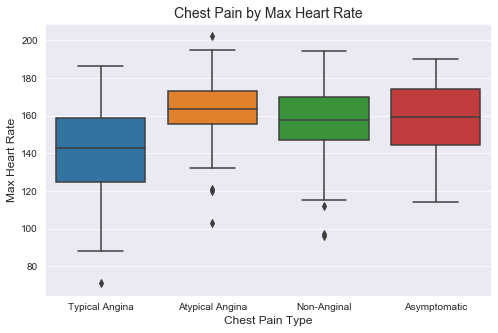

In [263]:
plt.subplots(figsize = (8,5));
cm = sns.boxplot(x = 'Chest_Pain_Type', y = 'Max_Heart_Rate', data = df)
cm.set_title('Chest Pain by Max Heart Rate',fontsize=14)
cm.set_ylabel('Max Heart Rate',fontsize=12)
cm.set_xlabel('Chest Pain Type',fontsize=12)
plt.savefig('cm.png')

## Independant Variable 4: Resting Blood Pressure

In [29]:
#High blood pressure is a systolic pressure of 130 or higher and below 130 is considred normal
#1 = High Blood Pressure
#0 = Normal

df['Blood_Pressure_Level'] = np.where(df['Resting_Blood_Pressure'] > 130, 1,0)

In [30]:
df.groupby(['Heart_Disease',])['Resting_Blood_Pressure'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,134.398551,18.729944,100.0,120.0,130.0,144.75,200.0
Heart Disease,164.0,129.250000,16.204739,94.0,120.0,130.0,140.00,180.0


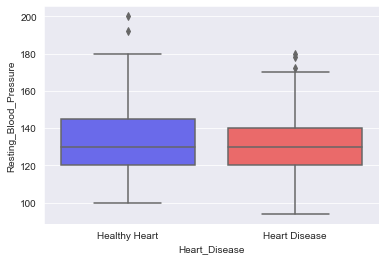

In [31]:
rsb = sns.boxplot(data=df, x="Heart_Disease", y="Resting_Blood_Pressure",palette="seismic")

In [32]:
df[df['Resting_Blood_Pressure']>180]

,Age,Gender,Chest_Pain,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Indused_Angina,Oldpeak,Slope,Major_Vessels,Thalassemia,Target,Heart_Disease,Age-Group,Chest_Pain_Type,Blood_Pressure_Level
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0,Healthy Heart,1,Atypical Angina,1
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,Healthy Heart,2,Typical Angina,1


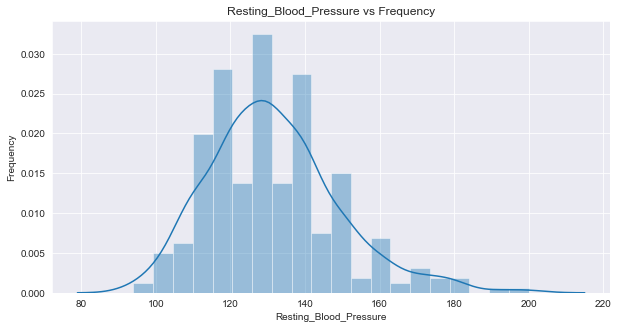

In [33]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df['Resting_Blood_Pressure'],kde=True, bins=20);
ax.set(xlabel='Resting_Blood_Pressure', ylabel='Frequency', title='Resting_Blood_Pressure vs Frequency');

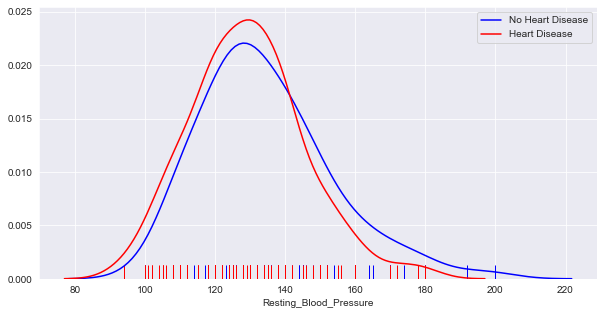

In [34]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df[df['Target']==0].Resting_Blood_Pressure, color='blue',hist=False, rug=True, label = 'No Heart Disease')
sns.distplot(df[df['Target']==1].Resting_Blood_Pressure, color='red',hist=False, rug=True, label = 'Heart Disease')

In [35]:
# Resting Blood Pressure doesnt seem to be very Telling of Heart Disease

## Independant Variable 5: Serum Cholesterol 

In [36]:
df.groupby(['Heart_Disease',])['Serum_Cholesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,251.086957,49.454614,131.0,217.25,249.0,283.00,409.0
Heart Disease,164.0,242.640244,53.456580,126.0,208.75,234.5,267.25,564.0


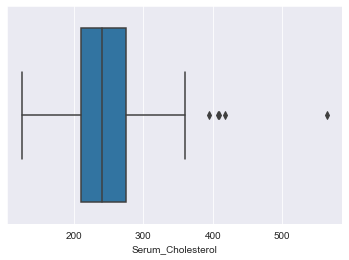

In [37]:
sns.boxplot(df.Serum_Cholesterol)

In [38]:
df[df['Serum_Cholesterol']>400]

,Age,Gender,Chest_Pain,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Indused_Angina,Oldpeak,Slope,Major_Vessels,Thalassemia,Target,Heart_Disease,Age-Group,Chest_Pain_Type,Blood_Pressure_Level
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1,Heart Disease,2,Non-Anginal,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,Heart Disease,2,Non-Anginal,0
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,Healthy Heart,2,Typical Angina,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0,Healthy Heart,2,Typical Angina,1


In [39]:
# Healthy serum cholesterol is less than 200 mg/dL
df['Serum_Cholesterol_Level'] = np.where(df['Serum_Cholesterol'] > 200, 1,0)

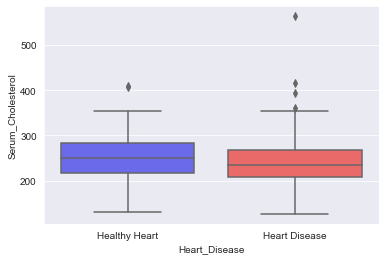

In [40]:
rsb = sns.boxplot(data=df, x="Heart_Disease", y="Serum_Cholesterol",palette="seismic")

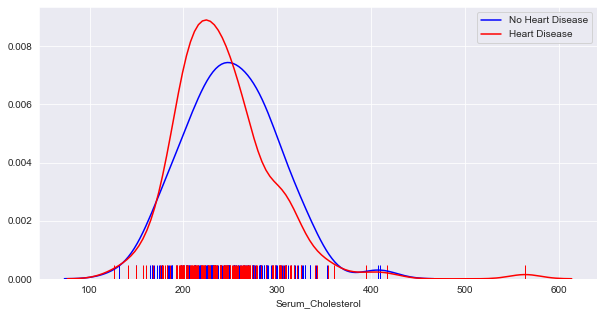

In [41]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df[df['Target']==0].Serum_Cholesterol, color='blue',hist=False, rug=True, label = 'No Heart Disease')
sns.distplot(df[df['Target']==1].Serum_Cholesterol, color='red',hist=False, rug=True, label = 'Heart Disease')

Text(0.5, 1.0, 'Resting Blood Pressure vs Serum Cholesterol')

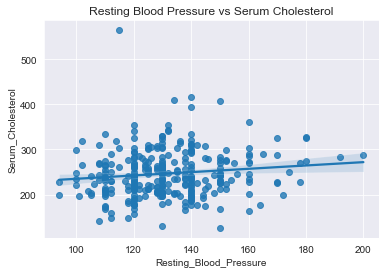

In [42]:
sns.regplot(x=df.Resting_Blood_Pressure,y=df.Serum_Cholesterol)
plt.title('Resting Blood Pressure vs Serum Cholesterol')

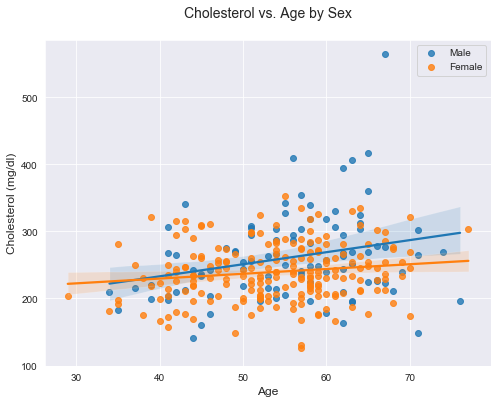

In [244]:
plt.figure(figsize=(8,6))
sns.regplot('Age', 'Serum_Cholesterol', data=df[df.Gender == 0], label='Male')
sns.regplot('Age', 'Serum_Cholesterol', data=df[df.Gender == 1], label='Female')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Cholesterol vs. Age by Sex\n', fontsize=14)
plt.legend();
plt.savefig('mf4.png')

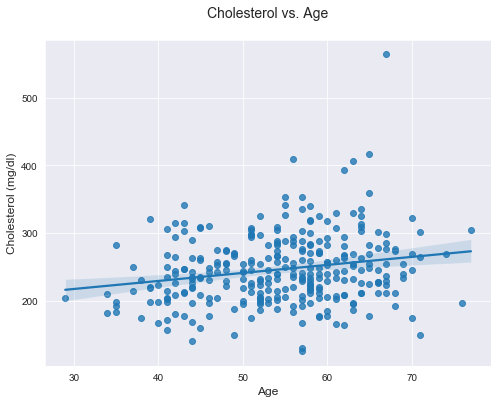

In [44]:
plt.figure(figsize=(8,6))
p = sns.regplot('Age', 'Serum_Cholesterol', data=df)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Cholesterol vs. Age\n', fontsize=14);

In [45]:
# We can say, based on this data, that both tend to have increase blood cholesterol levels with increases in age

## Independant Variable 5: Fasting Blood Pressure

In [46]:
#(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

In [47]:
df.groupby(['Heart_Disease'])['Fasting_Blood_Sugar'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,0.159420,0.367401,0.0,0.0,0.0,0.0,1.0
Heart Disease,164.0,0.140244,0.348303,0.0,0.0,0.0,0.0,1.0


[Text(0, 0, 'False'), Text(0, 0, 'True')]

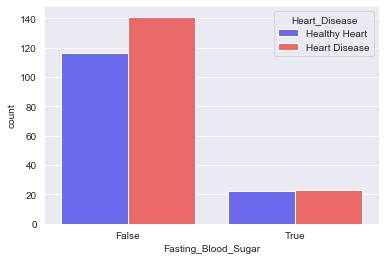

In [48]:
fbs = sns.countplot(x='Fasting_Blood_Sugar',hue="Heart_Disease",data=df.reset_index(),palette='seismic')
fbs.set_xticklabels(['False','True'])

## Independent Variable 7: Resting ECG

-- resting electrocardiographic results

In [49]:
df.groupby(['Heart_Disease'])['Resting_ECG'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,0.449275,0.541321,0.0,0.0,0.0,1.0,2.0
Heart Disease,164.0,0.591463,0.505358,0.0,0.0,1.0,1.0,2.0


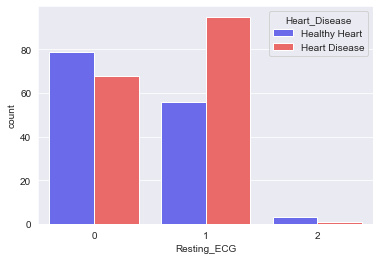

In [50]:
fbs = sns.countplot(x='Resting_ECG',hue="Heart_Disease",data=df.reset_index(),palette='seismic')


## Independent Variable 8: Max_Heart_Rate

In [51]:
df

,Age,Gender,Chest_Pain,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Indused_Angina,Oldpeak,Slope,Major_Vessels,Thalassemia,Target,Heart_Disease,Age-Group,Chest_Pain_Type,Blood_Pressure_Level,Serum_Cholesterol_Level
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Healthy Heart,1,Typical Angina,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Healthy Heart,1,Typical Angina,1,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Healthy Heart,2,Typical Angina,1,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Healthy Heart,2,Typical Angina,1,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Healthy Heart,2,Typical Angina,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,Heart Disease,2,Non-Anginal,0,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,Heart Disease,1,Non-Anginal,0,0
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,Healthy Heart,1,Typical Angina,0,1
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,Healthy Heart,2,Asymptomatic,1,1


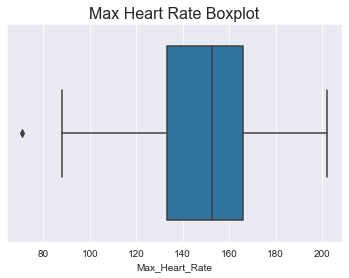

In [196]:
mhr3 = sns.boxplot(df.Max_Heart_Rate)
mhr3.set_title('Max Heart Rate Boxplot', fontsize=16)
plt.savefig("Max_Heart_Rate_3.png")

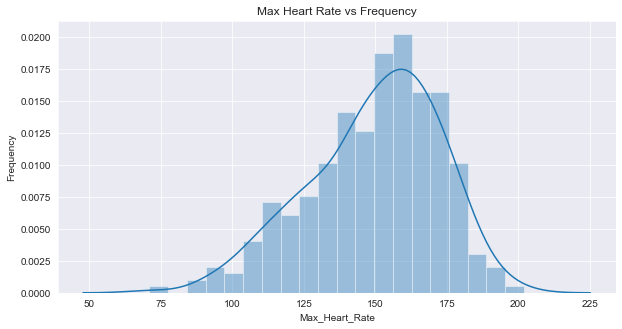

In [264]:
fig, ax = plt.subplots(figsize = (10,5));
sns.distplot(df['Max_Heart_Rate'],kde=True, bins=20);
ax.set(xlabel='Max_Heart_Rate', ylabel='Frequency', title='Max Heart Rate vs Frequency');

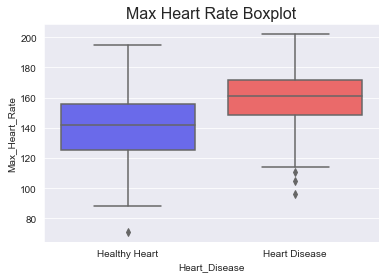

In [195]:
rsb = sns.boxplot(data=df, x="Heart_Disease", y="Max_Heart_Rate",palette="seismic")
rsb.set_title('Max Heart Rate Boxplots', fontsize=16)
plt.savefig("Max_Heart_Rate_2.png")

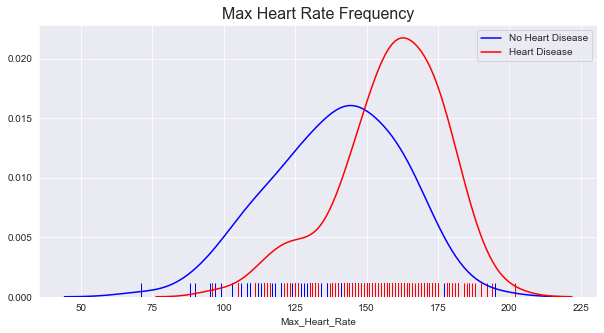

In [194]:
fig, ax = plt.subplots(figsize = (10,5));
mhr1 = sns.distplot(df[df['Target']==0].Max_Heart_Rate, color='blue',hist=False, rug=True, label = 'No Heart Disease')
mhr1 = sns.distplot(df[df['Target']==1].Max_Heart_Rate, color='red',hist=False, rug=True, label = 'Heart Disease')
mhr1.set_title('Max Heart Rate Frequency', fontsize=16)
plt.savefig("Max_Heart_Rate_1.png")

Null Hypothesis: Max Heart Rate is the same in patients with Heart Disease and Without Heart Disease


Alternative Hypothesis: Max Heart Rate is greater in patients with Heart Disease

In [56]:
import scipy.stats as stats
from scipy.stats import ttest_ind

mhr_hh = df[df['Target']==0].Max_Heart_Rate
mhr_nhh = df[df['Target']==1].Max_Heart_Rate

mhr_hh.shape, mhr_nhh.shape

((138,), (164,))

In [57]:
print(ttest_ind(mhr_hh, mhr_nhh))
ttest_ind(mhr_hh, mhr_nhh)[1]/2

Ttest_indResult(statistic=-8.014848252140112, pvalue=2.4761460479234722e-14)


1.2380730239617361e-14

Reject the Null Hypothesis

In [265]:
df.columns

Index(['Age', 'Gender', 'Chest_Pain', 'Resting_Blood_Pressure',
       'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG',
       'Max_Heart_Rate', 'Exercise_Indused_Angina', 'Oldpeak', 'Slope',
       'Major_Vessels', 'Thalassemia', 'Target', 'Heart_Disease',
       'Chest_Pain_Type', 'Oldpeak_Binary', 'Age-Group'],
      dtype='object')

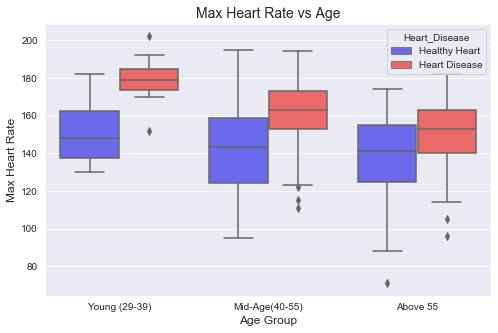

In [278]:
plt.subplots(figsize = (8,5));
mh = sns.boxplot(x = 'Age-Group', y = 'Max_Heart_Rate', hue = 'Heart_Disease',data = df, palette="seismic")
mh.set_title('Max Heart Rate vs Age',fontsize=14)
mh.set_ylabel('Max Heart Rate',fontsize=12)
mh.set_xlabel('Age Group',fontsize=12)
mh.set_xticklabels(['Young (29-39)','Mid-Age(40-55)','Above 55'])
plt.savefig('mh.png')

## Independent Variable 9: Exercise_Indused_Angina

---exercise induced angina (0 = no, 1 = yes)

In [208]:
df.groupby(['Exercise_Indused_Angina'])['Heart_Disease'].describe()

,count,unique,top,freq
Exercise_Indused_Angina,,,,
0,203,2,Heart Disease,141
1,99,2,Healthy Heart,76


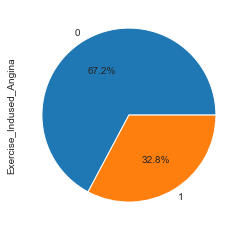

In [207]:
df['Exercise_Indused_Angina'].value_counts().plot.pie(autopct="%.1f%%")

[Text(0, 0, 'False'), Text(0, 0, 'True')]

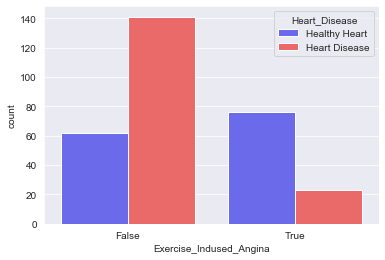

In [59]:
eia = sns.countplot(x='Exercise_Indused_Angina',hue="Heart_Disease",data=df.reset_index(),palette='seismic')
eia.set_xticklabels(['False','True'])

## Independent Variable 10: Oldpeak

---ST depression induced by exercise relative to rest

In [60]:
df.groupby(['Heart_Disease'])['Oldpeak'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,1.585507,1.300340,0.0,0.6,1.4,2.500,6.2
Heart Disease,164.0,0.586585,0.781734,0.0,0.0,0.2,1.025,4.2


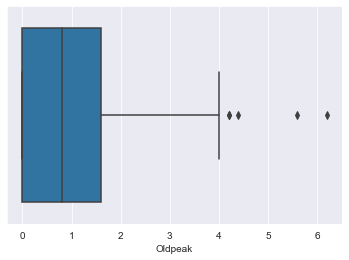

In [61]:
sns.boxplot(df.Oldpeak)

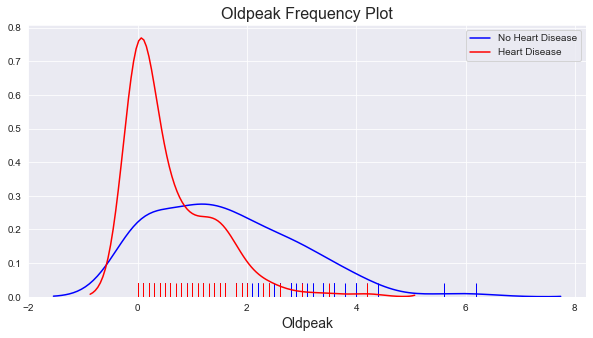

In [220]:
fig, ax = plt.subplots(figsize = (10,5));
op = sns.distplot(df[df['Target']==0].Oldpeak, color='blue',hist=False, rug=True, label = 'No Heart Disease')
op = sns.distplot(df[df['Target']==1].Oldpeak, color='red',hist=False, rug=True, label = 'Heart Disease')
op.set_title('Oldpeak Frequency Plot',fontsize=16)
plt.xlabel('Oldpeak',fontsize=14)
plt.savefig("oldpeak1.png")

In [221]:
df["Oldpeak_Binary"] = np.where(df['Oldpeak'] < 1, 0, 1)

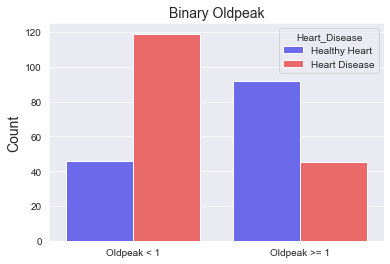

In [231]:
op = sns.countplot(x='Oldpeak_Binary',hue="Heart_Disease",data=df.reset_index(),palette='seismic')
op.set_xticklabels(['Oldpeak < 1','Oldpeak >= 1']) 
plt.ylabel('Count',fontsize=14)
plt.xlabel('',fontsize=14)
plt.title('Binary Oldpeak',fontsize=14 )

plt.savefig("oldpeak3.png")

## Independent Variable 11: Slope

---the slope of the peak exercise ST segment

upsloping, flat, downsloping

In [63]:
df.groupby(['Heart_Disease'])['Slope'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,1.166667,0.561324,0.0,1.0,1.0,1.75,2.0
Heart Disease,164.0,1.591463,0.594598,0.0,1.0,2.0,2.00,2.0


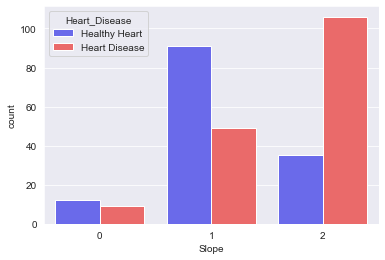

In [64]:
s = sns.countplot(x='Slope',hue="Heart_Disease",data=df.reset_index(),palette='seismic')

## Independent Variable 12: Major_Vessels
---number of major vessels (0-3)



In [65]:
df.groupby(['Heart_Disease'])['Major_Vessels'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,1.166667,1.043460,0.0,0.0,1.0,2.0,4.0
Heart Disease,164.0,0.341463,0.802137,0.0,0.0,0.0,0.0,4.0


In [66]:
df.groupby(['Heart_Disease'])['Major_Vessels'].value_counts()

Heart_Disease  Major_Vessels
Healthy Heart  0                 45
               1                 44
               2                 31
               3                 17
               4                  1
Heart Disease  0                130
               1                 21
               2                  7
               3                  3
               4                  3
Name: Major_Vessels, dtype: int64

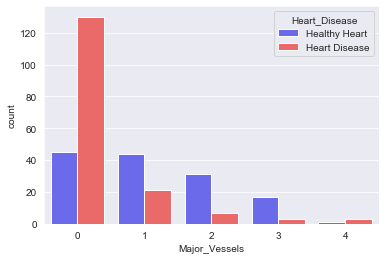

In [67]:
sns.countplot(x='Major_Vessels',hue="Heart_Disease",data=df.reset_index(),palette='seismic')

## Independent Variable 13: Thalassemia
--- 3 = normal; 6 = fixed defect; 7 = reversable defect

In [169]:
df.Thalassemia.value_counts()

2    165
3    117
1     18
0      2
Name: Thalassemia, dtype: int64

In [170]:
df['Thalassemia'] = np.where(df['Thalassemia'] == 0, 1, df['Thalassemia'])

In [171]:
df.groupby(['Heart_Disease'])['Thalassemia'].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_Disease,,,,,,,,
Healthy Heart,138.0,2.550725,0.662581,1.0,2.0,3.0,3.0,3.0
Heart Disease,164.0,2.128049,0.445227,1.0,2.0,2.0,2.0,3.0


In [172]:
df.groupby(['Heart_Disease'])['Thalassemia'].value_counts()

Heart_Disease  Thalassemia
Healthy Heart  3               89
               2               36
               1               13
Heart Disease  2              129
               3               28
               1                7
Name: Thalassemia, dtype: int64

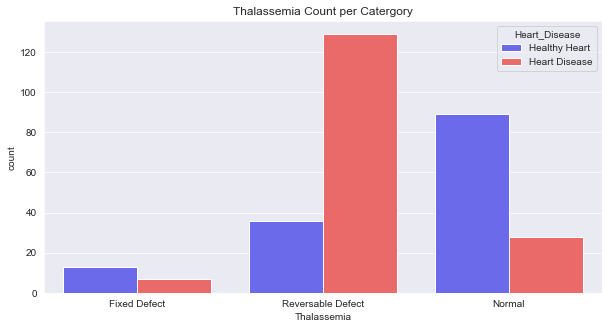

In [188]:
fig, ax = plt.subplots(figsize = (10,5))
tp = sns.countplot(x='Thalassemia',hue="Heart_Disease",data=df.reset_index(),palette='seismic')
tp.set_xticklabels(['Fixed Defect','Reversable Defect', 'Normal'])
tp.set_title('Thalassemia Count per Catergory')
plt.savefig("Thalassemia1.png")

# Feature Engineering

In [73]:
df.drop(columns=['Age-Group','Chest_Pain', 'Heart_Disease','Blood_Pressure_Level'],inplace=True)

In [74]:
df

,Age,Gender,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_ECG,Max_Heart_Rate,Exercise_Indused_Angina,Oldpeak,Slope,Major_Vessels,Thalassemia,Target,Chest_Pain_Type,Serum_Cholesterol_Level
0,52,1,125,212,0,1,168,0,1.0,2,2,3,0,Typical Angina,1
1,53,1,140,203,1,0,155,1,3.1,0,0,3,0,Typical Angina,1
2,70,1,145,174,0,1,125,1,2.6,0,0,3,0,Typical Angina,0
3,61,1,148,203,0,1,161,0,0.0,2,1,3,0,Typical Angina,1
4,62,0,138,294,1,1,106,0,1.9,1,3,2,0,Typical Angina,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,0,0,115,0,1.5,1,0,2,1,Non-Anginal,1
733,44,0,108,141,0,1,175,0,0.6,1,0,2,1,Non-Anginal,0
739,52,1,128,255,0,1,161,1,0.0,2,1,3,0,Typical Angina,1
843,59,1,160,273,0,0,125,0,0.0,2,0,2,0,Asymptomatic,1


In [75]:
##### Create Age Bins #####
bins = [0,40,55,100]
labels = ['young','middle','old']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)
##### Get Dummies #####
df = pd.get_dummies(df, columns = ['Age'], drop_first= True)

In [76]:
##### Creat Dummies for Resting_ECG #####
df = pd.get_dummies(df, columns = ['Resting_ECG'], drop_first= True)

In [77]:
##### Create binary values for "High Oldpeak" (<2) and "Low Oldpeak" (>=2) #####
df['Oldpeak'] = np.where(df['Oldpeak'] > 2, 1,0)

In [78]:
##### Creat Dummies for Resting_ECG #####
df = pd.get_dummies(df, columns = ['Slope'], drop_first= True)

In [79]:
##### Creat Dummies for Major_Vessels #####
df = pd.get_dummies(df, columns = ['Major_Vessels'], drop_first= True)

In [80]:
##### Creat Dummies for Thalassemia #####
df['Thalassemia'] = np.where(df['Thalassemia'] == 0, 1, df['Thalassemia'])
df = pd.get_dummies(df, columns = ['Thalassemia'], drop_first= True)

In [81]:
##### Creat Dummies for Chest_Pain_Type #####
df = pd.get_dummies(df, columns = ['Chest_Pain_Type'], drop_first= True)

In [82]:
df.nunique()

Gender                               2
Resting_Blood_Pressure              49
Serum_Cholesterol                  152
Fasting_Blood_Sugar                  2
Max_Heart_Rate                      91
Exercise_Indused_Angina              2
Oldpeak                              2
Target                               2
Serum_Cholesterol_Level              2
Age_middle                           2
Age_old                              2
Resting_ECG_1                        2
Resting_ECG_2                        2
Slope_1                              2
Slope_2                              2
Major_Vessels_1                      2
Major_Vessels_2                      2
Major_Vessels_3                      2
Major_Vessels_4                      2
Thalassemia_2                        2
Thalassemia_3                        2
Chest_Pain_Type_Atypical Angina      2
Chest_Pain_Type_Non-Anginal          2
Chest_Pain_Type_Asymptomatic         2
dtype: int64

# Feature Selection

In [83]:
for colname in df.columns:
    df[colname] = df[colname].astype(float)

In [84]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Target', axis=1) # grabs everything else but 'Default'

# Create target variable
y = df['Target'] # y is the column we're trying to predict

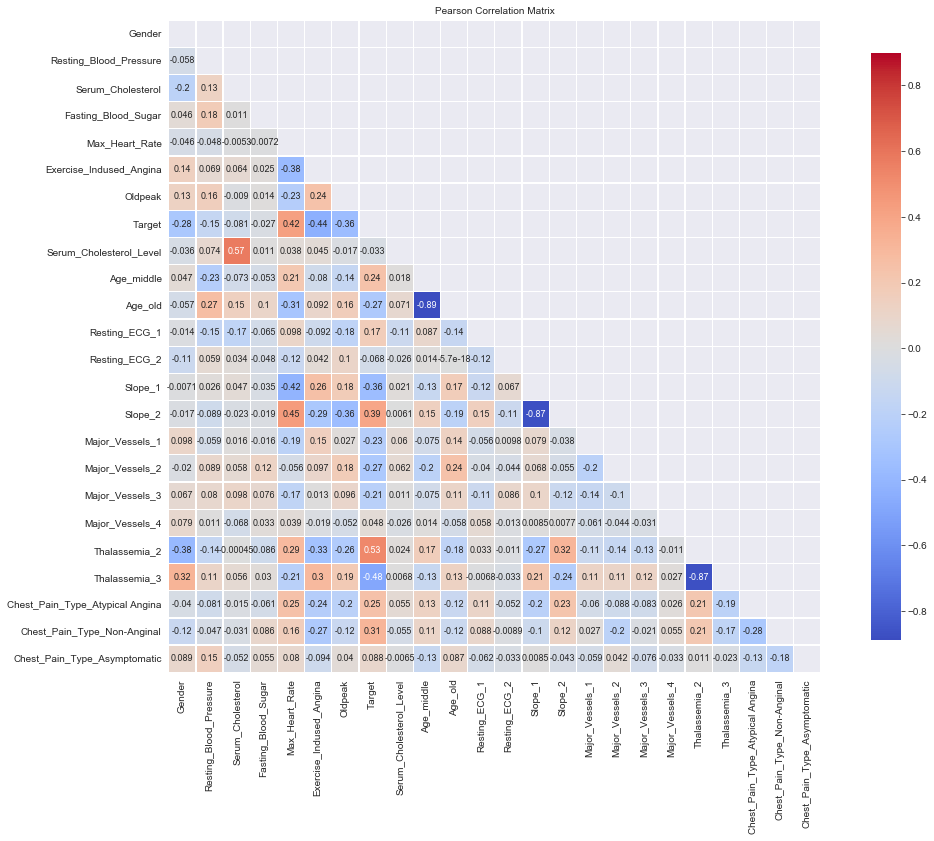

In [85]:
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(18, 12))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.9,square=True,cmap="coolwarm",
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()

In [86]:
corrs_dict={}
for col in X.columns:
    corr=y.corr(X[col])
    corrs_dict[corr]=col

In [87]:
sorted(corrs_dict.items(),reverse=True)

[(0.5260296712540145, 'Thalassemia_2'),
 (0.4199550436638699, 'Max_Heart_Rate'),
 (0.39212098451105937, 'Slope_2'),
 (0.3136956289926139, 'Chest_Pain_Type_Non-Anginal'),
 (0.2476494048918161, 'Chest_Pain_Type_Atypical Angina'),
 (0.23800269081918843, 'Age_middle'),
 (0.17282711516308885, 'Resting_ECG_1'),
 (0.08795861420425954, 'Chest_Pain_Type_Asymptomatic'),
 (0.04813272102108149, 'Major_Vessels_4'),
 (-0.026825970565970074, 'Fasting_Blood_Sugar'),
 (-0.03304360782631137, 'Serum_Cholesterol_Level'),
 (-0.06815593296585133, 'Resting_ECG_2'),
 (-0.08143720051844137, 'Serum_Cholesterol'),
 (-0.14626866384155432, 'Resting_Blood_Pressure'),
 (-0.2101259526429759, 'Major_Vessels_3'),
 (-0.23125456761608315, 'Major_Vessels_1'),
 (-0.26588786948167514, 'Age_old'),
 (-0.2732946394667862, 'Major_Vessels_2'),
 (-0.2836093577958622, 'Gender'),
 (-0.36025797049575103, 'Slope_1'),
 (-0.36040035346044913, 'Oldpeak'),
 (-0.4356007617136186, 'Exercise_Indused_Angina'),
 (-0.4848868448354393, 'Thalass

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_(X):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif['Features'] = X.columns
    return vif
Vif = vif_(X)

In [89]:
Vif.sort_values('VIF',ascending=False)[:5]

,VIF,Features
1,50.517507,Resting_Blood_Pressure
4,50.453036,Max_Heart_Rate
2,37.228214,Serum_Cholesterol
9,10.548862,Age_old
18,10.470699,Thalassemia_2


In [90]:
df.to_csv('final_df.csv')